# Ticket Pridiction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
X_test = pd.read_csv("X_test.csv")

In [6]:
print(X_test.shape) 
X_test.head()

(4532489, 10)


f1 f2 f3                         f4  \
0  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 11:00:00+00:00   
1  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 14:00:00+00:00   
2  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 05:00:00+00:00   
3  2021-09-01 08:30:20.396761+00:00  x  y  2021-09-08 05:30:00+00:00   
4  2021-09-01 08:30:20.396761+00:00  x  y  2021-09-08 05:30:00+00:00   

                          f5     f6    f7    f8  f9   f10  
0  2021-09-08 12:55:00+00:00   beta  True  40.0   0  b-69  
1  2021-09-08 15:55:00+00:00   beta  True  40.0   0   b-9  
2  2021-09-08 06:55:00+00:00   beta  True  20.0   0   b-1  
3  2021-09-08 07:30:00+00:00  gamma  True  20.0   2   c-2  
4  2021-09-08 07:30:00+00:00  gamma  True  20.0   1   c-2

In [7]:
y_train = pd.read_csv("y_train.csv")

In [8]:
y_train.head()

Unnamed: 0   target
0           0   7400.0
1           1   8650.0
2           2   9150.0
3           3  10400.0
4           4   8697.0

In [9]:
y_train.columns

Index(['Unnamed: 0', 'target'], dtype='object')

In [10]:
y_train.drop(['Unnamed: 0'],axis = 1)

target
0          7400.0
1          8650.0
2          9150.0
3         10400.0
4          8697.0
...           ...
21776585   8381.0
21776586   9045.0
21776587   6155.0
21776588   6155.0
21776589   6605.0

[21776590 rows x 1 columns]

In [11]:
test_columns = ["Ticket Purchase Date Time","Origin","Destination","Departure Date Time",
                "Arrival Date Time","Airline","Refundable Ticket","Baggage Weight","Baggage Pieces",
                "Flight Number"]

In [12]:
dateTimeFormatter = '%Y-%m-%d %H:%M:%S.%f'


In [13]:
X_train = pd.read_csv("X_train.csv")

In [18]:
X_train.head(10)

Unnamed: 0                                f1 f2 f3  \
0           0  2020-12-31 09:46:17.463002+00:00  x  y   
1           1  2020-12-31 09:46:17.463002+00:00  x  y   
2           2  2020-12-31 09:46:17.463002+00:00  x  y   
3           3  2020-12-31 09:46:17.463002+00:00  x  y   
4           4  2020-12-31 09:46:18.191119+00:00  x  y   
5           5  2020-12-31 09:46:18.191119+00:00  x  y   
6           6  2020-12-31 09:46:18.191119+00:00  x  y   
7           7  2020-12-31 09:46:18.191119+00:00  x  y   
8           8  2020-12-31 09:46:19.878719+00:00  x  y   
9           9  2020-12-31 09:46:19.878719+00:00  x  y   

                          f4                         f5     f6     f7    f8  \
0  2021-01-10 05:00:00+00:00  2021-01-10 07:00:00+00:00  gamma   True   0.0   
1  2021-01-10 05:00:00+00:00  2021-01-10 07:00:00+00:00  gamma   True  32.0   
2  2021-01-10 11:00:00+00:00  2021-01-10 13:00:00+00:00  gamma   True  32.0   
3  2021-01-10 11:00:00+00:00  2021-01-10 13:00:00+00:00  gamma   True  32.0   
4  2021-01-25 11:00:00+00:00  2021-01-25 12:55:00+00:00   beta  False  20.0   
5  2021-01-25 05:00:00+00:00  2021-01-25 06:55:00+00:00   beta  False  20.0   
6  2021-01-25 14:00:00+00:00  2021-01-25 15:55:00+00:00   beta  False  20.0   
7  2021-01-25 16:00:00+00:00  2021-01-25 17:55:00+00:00   beta  False  20.0   
8  2021-01-25 11:00:00+00:00  2021-01-25 13:00:00+00:00  gamma   True  32.0   
9  2021-01-25 11:00:00+00:00  2021-01-25 13:00:00+00:00  gamma   True  32.0   

   f9   f10  
0   0   c-2  
1   1   c-2  
2   1   c-4  
3   2   c-4  
4   0  b-69  
5   0   b-1  
6   0   b-9  
7   0  b-19  
8   2   c-4  
9   1   c-4

In [15]:
X_train.shape

(21776590, 11)

In [16]:
(y_train.shape)

(21776590, 2)

In [17]:
test_columns

['Ticket Purchase Date Time',
 'Origin',
 'Destination',
 'Departure Date Time',
 'Arrival Date Time',
 'Airline',
 'Refundable Ticket',
 'Baggage Weight',
 'Baggage Pieces',
 'Flight Number']

In [1]:
def prepareData(df):
    pd.options.mode.chained_assignment = None 

    if 'Unnamed: 0' in df:
        df = df.drop(['Unnamed: 0'],axis = 1)
    df.columns = test_columns
    #convert column to date time 
    df[[test_columns[0],test_columns[3],test_columns[4]]] = df[[test_columns[0],test_columns[3],test_columns[4]]].apply(pd.to_datetime, format=dateTimeFormatter)
    #seperating 
    df["Ticket_Purchase_Day"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.day
    df["Ticket_Purchase_Month"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.month
    df["Ticket_Purchase_Year"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.year
    df["Ticket_Purchase_Hour"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.hour
    df["Ticket_Purchase_Minute"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.minute

    df["Departure_Day"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.day
    df["Departure_Month"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.month
    df["Departure_Year"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.year
    df["Departure_Hour"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.hour
    df["Departure_Minute"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.minute
    
    df["Arrival_Day"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.day
    df["Arrival_Month"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.month
    df["Arrival_Year"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.year
    df["Arrival_Hour"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.hour
    df["Arrival_Minute"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.minute

    df.drop([test_columns[0],test_columns[1],test_columns[2],test_columns[3], test_columns[4]], axis = 1, inplace = True)
    
    #Airline = pd.get_dummies(df[test_columns[5]], drop_first= True)
    #BaggageWeight = pd.get_dummies(df[test_columns[7]], drop_first= True) 
    #BaggagePieces = pd.get_dummies(df[test_columns[8]], drop_first= True) 
    FlightNumber = pd.get_dummies(df[test_columns[9]], drop_first= True) 
    
    df.replace({True: 1, False: 0}, inplace = True)
    df.replace({'alpha': 0, 'gamma': 1, "beta":2,"omega":3}, inplace = True)
    df.replace({0: 0, 15:1, 20:2, 32:3, 35:4, 40:5, 45:6}, inplace = True)

    #df = pd.concat([df, Airline, Source, Destination], axis = 1)

    df = pd.concat([df, FlightNumber], axis = 1)

    #data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
    df.drop([test_columns[9]], axis = 1, inplace = True)


    return df


In [19]:

X_train_final = prepareData(X_train.head(1000))

In [20]:
X_train_final.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        1                  1             0.0               0   
1        1                  1             3.0               1   
2        1                  1             3.0               1   
3        1                  1             3.0               2   
4        2                  0             2.0               0   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                   31                     12                  2020   
1                   31                     12                  2020   
2                   31                     12                  2020   
3                   31                     12                  2020   
4                   31                     12                  2020   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     9                      46             10   
1                     9                      46             10   
2                     9                      46             10   
3                     9                      46             10   
4                     9                      46             25   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                1            2021               5                 0   
1                1            2021               5                 0   
2                1            2021              11                 0   
3                1            2021              11                 0   
4                1            2021              11                 0   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0           10              1          2021             7               0   
1           10              1          2021             7               0   
2           10              1          2021            13               0   
3           10              1          2021            13               0   
4           25              1          2021            12              55   

   a-5  a-7  b-1  b-19  b-67  b-69  b-9  c-2  c-4  c-6  
0    0    0    0     0     0     0    0    1    0    0  
1    0    0    0     0     0     0    0    1    0    0  
2    0    0    0     0     0     0    0    0    1    0  
3    0    0    0     0     0     0    0    0    1    0  
4    0    0    0     0     0     1    0    0    0    0

In [21]:
X_test_final = prepareData(X_test.head(1000))
#X_test_final['Price'] = y_train['target'] 

In [22]:
X_test_final.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        2                  1             5.0               0   
1        2                  1             5.0               0   
2        2                  1             2.0               0   
3        1                  1             2.0               2   
4        1                  1             2.0               1   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                    1                      9                  2021   
1                    1                      9                  2021   
2                    1                      9                  2021   
3                    1                      9                  2021   
4                    1                      9                  2021   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     8                      30              8   
1                     8                      30              8   
2                     8                      30              8   
3                     8                      30              8   
4                     8                      30              8   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                9            2021              11                 0   
1                9            2021              14                 0   
2                9            2021               5                 0   
3                9            2021               5                30   
4                9            2021               5                30   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0            8              9          2021            12              55   
1            8              9          2021             1              55   
2            8              9          2021             6              55   
3            8              9          2021             7              30   
4            8              9          2021             7              30   

   a-23  a-5  a-7  a-9  b-1  b-19  b-319  b-69  b-73  b-9  c-2  c-4  c-6  d-1  \
0     0    0    0    0    0     0      0     1     0    0    0    0    0    0   
1     0    0    0    0    0     0      0     0     0    1    0    0    0    0   
2     0    0    0    0    1     0      0     0     0    0    0    0    0    0   
3     0    0    0    0    0     0      0     0     0    0    1    0    0    0   
4     0    0    0    0    0     0      0     0     0    0    1    0    0    0   

   d-3  d-5  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [23]:
X_train_final.columns

Index(['Airline', 'Refundable Ticket', 'Baggage Weight', 'Baggage Pieces',
       'Ticket_Purchase_Day', 'Ticket_Purchase_Month', 'Ticket_Purchase_Year',
       'Ticket_Purchase_Hour', 'Ticket_Purchase_Minute', 'Departure_Day',
       'Departure_Month', 'Departure_Year', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Day', 'Arrival_Month', 'Arrival_Year',
       'Arrival_Hour', 'Arrival_Minute', 'a-5', 'a-7', 'b-1', 'b-19', 'b-67',
       'b-69', 'b-9', 'c-2', 'c-4', 'c-6'],
      dtype='object')

In [25]:
X = X_train_final.loc[:,['Airline', 'Refundable Ticket', 'Baggage Weight', 'Baggage Pieces',
       'Ticket_Purchase_Day', 'Ticket_Purchase_Month', 'Ticket_Purchase_Year',
       'Ticket_Purchase_Hour', 'Ticket_Purchase_Minute', 'Departure_Day',
       'Departure_Month', 'Departure_Year', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Day', 'Arrival_Month', 'Arrival_Year',
       'Arrival_Hour', 'Arrival_Minute', 'a-5', 'a-7', 'b-1', 'b-19', 'b-67',
       'b-69', 'b-9', 'c-2', 'c-4', 'c-6']]
X.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        1                  1             0.0               0   
1        1                  1             3.0               1   
2        1                  1             3.0               1   
3        1                  1             3.0               2   
4        2                  0             2.0               0   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                   31                     12                  2020   
1                   31                     12                  2020   
2                   31                     12                  2020   
3                   31                     12                  2020   
4                   31                     12                  2020   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     9                      46             10   
1                     9                      46             10   
2                     9                      46             10   
3                     9                      46             10   
4                     9                      46             25   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                1            2021               5                 0   
1                1            2021               5                 0   
2                1            2021              11                 0   
3                1            2021              11                 0   
4                1            2021              11                 0   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0           10              1          2021             7               0   
1           10              1          2021             7               0   
2           10              1          2021            13               0   
3           10              1          2021            13               0   
4           25              1          2021            12              55   

   a-5  a-7  b-1  b-19  b-67  b-69  b-9  c-2  c-4  c-6  
0    0    0    0     0     0     0    0    1    0    0  
1    0    0    0     0     0     0    0    1    0    0  
2    0    0    0     0     0     0    0    0    1    0  
3    0    0    0     0     0     0    0    0    1    0  
4    0    0    0     0     0     1    0    0    0    0

In [26]:
X.nunique()

Airline                    3
Refundable Ticket          2
Baggage Weight             4
Baggage Pieces             3
Ticket_Purchase_Day        1
Ticket_Purchase_Month      1
Ticket_Purchase_Year       1
Ticket_Purchase_Hour       2
Ticket_Purchase_Minute    27
Departure_Day             20
Departure_Month            4
Departure_Year             2
Departure_Hour             7
Departure_Minute           3
Arrival_Day               20
Arrival_Month              4
Arrival_Year               2
Arrival_Hour               8
Arrival_Minute             6
a-5                        2
a-7                        2
b-1                        2
b-19                       2
b-67                       2
b-69                       2
b-9                        2
c-2                        2
c-4                        2
c-6                        2
dtype: int64

In [27]:
y = y_train.iloc[:,1].head(1000)
y.head()

0     7400.0
1     8650.0
2     9150.0
3    10400.0
4     8697.0
Name: target, dtype: float64

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [29]:
print(selection.feature_importances_)


[1.22854736e-01 1.54193577e-02 3.91255594e-01 1.24091738e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.35767801e-04
 5.30593555e-03 1.07221036e-01 2.17504273e-02 8.10747215e-03
 2.27753858e-03 1.09253925e-03 1.06094341e-01 1.85156043e-02
 9.75164518e-03 2.97096825e-03 3.29618368e-03 1.16226833e-03
 4.72134247e-03 7.53630257e-05 8.56396989e-05 0.00000000e+00
 3.84184710e-03 3.34110933e-03 4.05437026e-02 5.79114796e-03
 9.66942697e-05]


In [30]:
X.shape,y.shape

((1000, 29), (1000,))

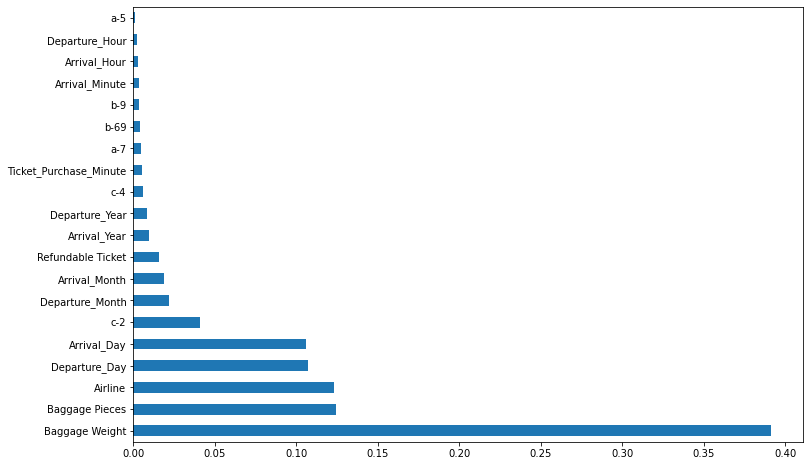

In [31]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 192)


In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)


In [35]:
reg_rf.score(X_train, y_train)


0.9969050252579985

In [36]:
reg_rf.score(X_test, y_test)


0.9781011220502992

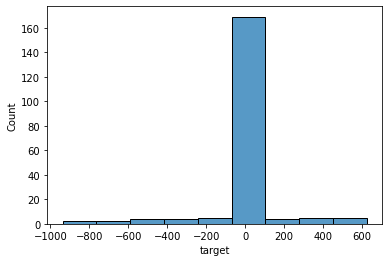

In [53]:
sns.histplot(y_test-y_pred)
plt.show()

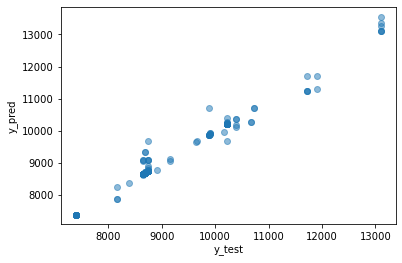

In [38]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [39]:
from sklearn import metrics


In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 62.48034999999999
MSE: 28918.680960499998
RMSE: 170.05493512538823


In [41]:
metrics.r2_score(y_test, y_pred)


0.9781011220502992

# Save the model to reuse it again


In [51]:
import pickle
# open a file, where you ant to store the data
file = open('datathon.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [52]:
model = open('datathon.pkl','rb')
forest = pickle.load(model)